In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data = np.load('/content/gdrive/MyDrive/AIL_project/data/data_pca_50_target.npz')
data.files

['arr_0', 'arr_1']

In [ ]:
data.allow_pickle = True

In [ ]:
X = data['arr_0'] # pca data with 50 components
y = data['arr_1'] # target or dependent variable

In [ ]:
X.shape,y.shape

((3020, 50), (3020,))

In [ ]:
X

array([[-0.6820039 , -0.63638271, -1.12103174, ...,  0.76755071,
        -1.03703776,  2.1989156 ],
       [ 0.31408768, -1.14186228,  0.23535902, ..., -0.22701835,
        -0.31892035,  0.60956122],
       [ 1.02596301, -0.08307998, -0.1950752 , ...,  0.36171984,
         0.2189939 ,  1.45745708],
       ...,
       [ 0.56467272, -0.82564856,  2.10718468, ...,  0.03658712,
         0.26309447,  0.77713934],
       [ 0.01794092,  1.6512519 ,  0.291359  , ...,  1.81787998,
         1.7467721 ,  0.17552435],
       [ 0.41279305,  0.70439399, -1.29159912, ...,  2.33078658,
         2.92135693, -1.80379534]])

In [ ]:
y

array(['empty', 'empty', 'empty', ..., 'jam', 'jam', 'jam'], dtype=object)

# Spliting Data

In [ ]:
x_train,x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(2416, 50) (604, 50) (2416,) (604,)


In [ ]:
model_svc = SVC(probability=True)

param_grid = {'C':[0.5,1,10,20,30,50],
             'kernel':['rbf','poly'],
             'gamma':[0.1,0.05,0.01,0.001,0.002,0.005],
             'coef0':[0,1]}

In [ ]:
model_grid = GridSearchCV(model_svc,
                          param_grid=param_grid,
                          scoring='accuracy',cv=3,verbose=2)

# Training

**Support Vector Machine**

In [ ]:
model_grid.fit(x_train,y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
[CV] END ..............C=0.5, coef0=0, gamma=0.1, kernel=rbf; total time=   1.2s
[CV] END ..............C=0.5, coef0=0, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END ..............C=0.5, coef0=0, gamma=0.1, kernel=rbf; total time=   1.2s
[CV] END .............C=0.5, coef0=0, gamma=0.1, kernel=poly; total time=   0.7s
[CV] END .............C=0.5, coef0=0, gamma=0.1, kernel=poly; total time=   0.7s
[CV] END .............C=0.5, coef0=0, gamma=0.1, kernel=poly; total time=   0.8s
[CV] END .............C=0.5, coef0=0, gamma=0.05, kernel=rbf; total time=   1.1s
[CV] END .............C=0.5, coef0=0, gamma=0.05, kernel=rbf; total time=   1.6s
[CV] END .............C=0.5, coef0=0, gamma=0.05, kernel=rbf; total time=   1.6s
[CV] END ............C=0.5, coef0=0, gamma=0.05, kernel=poly; total time=   0.9s
[CV] END ............C=0.5, coef0=0, gamma=0.05, kernel=poly; total time=   0.7s
[CV] END ............C=0.5, coef0=0, gamma=0.0

GridSearchCV(cv=3, estimator=SVC(probability=True),
             param_grid={'C': [0.5, 1, 10, 20, 30, 50], 'coef0': [0, 1],
                         'gamma': [0.1, 0.05, 0.01, 0.001, 0.002, 0.005],
                         'kernel': ['rbf', 'poly']},
             scoring='accuracy', verbose=2)

In [ ]:
model_grid.best_params_

{'C': 50, 'coef0': 0, 'gamma': 0.005, 'kernel': 'rbf'}

In [ ]:
model_final = model_grid.best_estimator_

In [ ]:
model_final.get_params()

{'C': 50,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.005,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### Model Evaluation
- Classification Report
    - Precision, Recall, F1-Score

- AUC
    - Less than 0.5 (Worst Model)
    - 0.5 to 0.6 (Bad Model)
    - 0.6 to 0.8 (Good Model)
    - 0.8 to 0.9 (Excellent Model)
    - 0.9 to 1.0 (Perfect Model)

In [ ]:
y_pred = model_final.predict(x_test) # predicted values

In [ ]:
y_pred

array(['low', 'low', 'empty', 'medium', 'low', 'empty', 'high', 'low',
       'low', 'low', 'low', 'low', 'high', 'empty', 'empty', 'empty',
       'jam', 'low', 'empty', 'low', 'low', 'jam', 'medium', 'medium',
       'high', 'low', 'medium', 'empty', 'empty', 'empty', 'low', 'high',
       'low', 'low', 'low', 'low', 'empty', 'medium', 'low', 'low',
       'empty', 'low', 'empty', 'empty', 'low', 'low', 'jam', 'medium',
       'medium', 'empty', 'low', 'low', 'medium', 'low', 'medium',
       'medium', 'empty', 'high', 'jam', 'medium', 'medium', 'low',
       'medium', 'empty', 'empty', 'low', 'high', 'high', 'empty', 'low',
       'medium', 'high', 'low', 'medium', 'empty', 'low', 'medium',
       'high', 'low', 'empty', 'medium', 'empty', 'medium', 'high',
       'high', 'empty', 'high', 'medium', 'high', 'high', 'empty',
       'empty', 'low', 'medium', 'low', 'high', 'low', 'high', 'high',
       'low', 'empty', 'empty', 'medium', 'empty', 'jam', 'empty',
       'medium', 'empty'

# Classification Report

In [ ]:
cr = metrics.classification_report(y_test,y_pred,output_dict=True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
empty,0.848837,0.829545,0.839080,176.000000
high,0.507246,0.460526,0.482759,76.000000
jam,0.694444,0.833333,0.757576,30.000000
low,0.638298,0.648649,0.643432,185.000000
medium,0.496403,0.503650,0.500000,137.000000
accuracy,0.653974,0.653974,0.653974,0.653974
macro avg,0.637046,0.655141,0.644569,604.000000
weighted avg,0.653761,0.653974,0.653361,604.000000


**Area Under Curve (AUC)**

In [ ]:
metrics.roc_auc_score(np.where(y_test=="high",1,0),
                      np.where(y_pred=="high",1,0))

0.6980661881977671

# Save Model

In [ ]:
import pickle
pickle.dump(model_final,open('/content/gdrive/MyDrive/AIL_project/model/model_svm.pickle',mode='wb'))

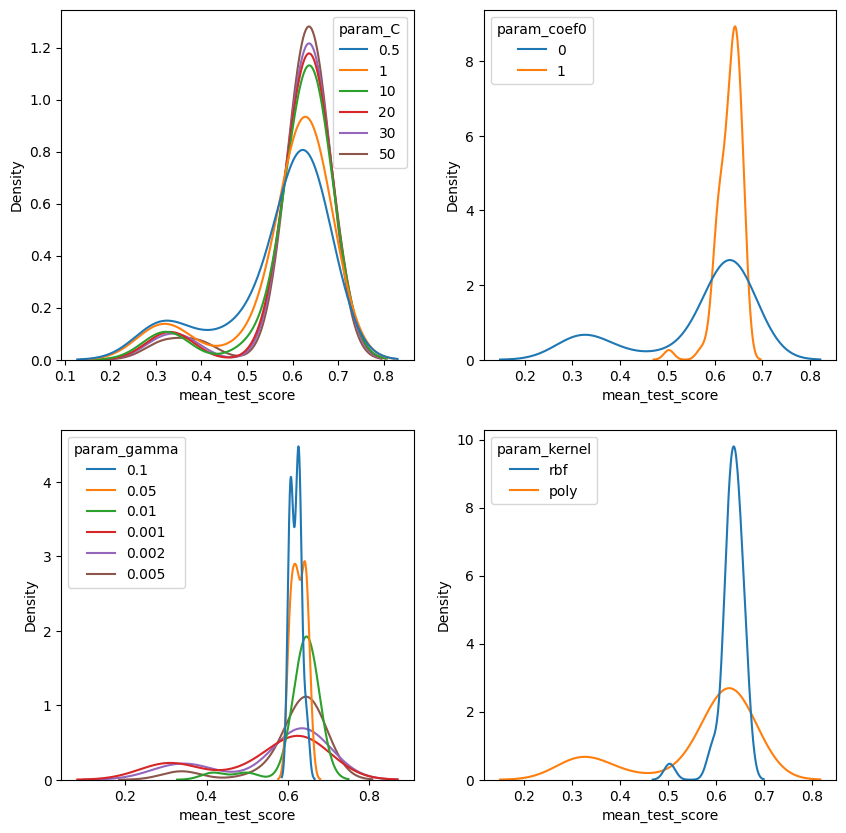

In [ ]:
cv_results = pd.DataFrame(model_grid.cv_results_)
param = ['param_C','param_coef0','param_gamma','param_kernel']
cv_results = cv_results[param+['mean_test_score']]
cv_results[param] = cv_results[param].astype(str)
plt.figure(figsize=(10,10))
for i, par in enumerate(param):
    plt.subplot(2,2,i+1)
    sns.kdeplot(data=cv_results,x='mean_test_score',hue=par)

In [ ]:
model_grid.best_params_

{'C': 50, 'coef0': 0, 'gamma': 0.005, 'kernel': 'rbf'}

**KNN, Decision Tree, Random Forest**

In [ ]:
# KNN
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
scaler= StandardScaler()
knn = KNeighborsClassifier()

In [ ]:
temp = [('scaler', scaler),('knn', knn)]

In [ ]:
pipeline = Pipeline(temp)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'knn__n_neighbors':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]}
grid_search = GridSearchCV(cv=5,estimator=pipeline, param_grid=param_grid, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'knn__n_neighbors': 14}


In [ ]:
print(grid_search)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')


In [ ]:
pipeline.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform'}

**Model Evaluation**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(x_test)
classification_report = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

In [ ]:
cm = np.array(confusion_mat)
cm

array([[141,   0,   9,  26,   0],
       [  1,  44,   1,   5,  25],
       [  8,   0,  22,   0,   0],
       [ 24,   6,   1, 127,  27],
       [  9,  23,   1,  50,  54]])

In [ ]:
cr = metrics.classification_report(y_test,y_pred,output_dict=True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
empty,0.770492,0.801136,0.785515,176.000000
high,0.602740,0.578947,0.590604,76.000000
jam,0.647059,0.733333,0.687500,30.000000
low,0.610577,0.686486,0.646310,185.000000
medium,0.509434,0.394161,0.444444,137.000000
accuracy,0.642384,0.642384,0.642384,0.642384
macro avg,0.628060,0.638813,0.630875,604.000000
weighted avg,0.635059,0.642384,0.636122,604.000000


### AUC

In [ ]:
metrics.roc_auc_score(np.where(y_test=="empty",1,0),
                      np.where(y_pred=="empty",1,0))

0.8515027612574342

In [ ]:
import pickle
pickle.dump(best_estimator,open('/content/gdrive/MyDrive/AIL_project/model/model_knn.pickle',mode='wb'))

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create a Decision Tree classifier
model_dt = DecisionTreeClassifier()

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [ ]:
model_grid = GridSearchCV(model_dt,
                          param_grid=param_grid,
                          scoring='accuracy',
                          cv=3,
                          verbose=2)

In [ ]:
model_grid.fit(x_train, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   0.1s
[CV

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=2)

In [ ]:
model_grid.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'splitter': 'random'}

In [ ]:
model_final = model_grid.best_estimator_

In [ ]:
model_final.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'random'}

**Model Evaluation**

In [ ]:
y_pred = model_final.predict(x_test)

In [ ]:
y_pred

array(['low', 'low', 'empty', 'medium', 'low', 'empty', 'low', 'low',
       'low', 'low', 'low', 'low', 'high', 'empty', 'jam', 'empty',
       'empty', 'empty', 'empty', 'low', 'low', 'high', 'medium', 'high',
       'high', 'low', 'low', 'empty', 'empty', 'empty', 'low', 'medium',
       'low', 'low', 'low', 'low', 'low', 'low', 'empty', 'low', 'empty',
       'low', 'jam', 'empty', 'medium', 'low', 'jam', 'low', 'medium',
       'empty', 'empty', 'low', 'high', 'low', 'medium', 'low', 'empty',
       'medium', 'jam', 'medium', 'medium', 'low', 'high', 'empty',
       'empty', 'low', 'low', 'high', 'empty', 'medium', 'low', 'medium',
       'empty', 'high', 'empty', 'low', 'medium', 'high', 'low', 'low',
       'medium', 'low', 'jam', 'high', 'medium', 'empty', 'medium', 'low',
       'low', 'medium', 'empty', 'empty', 'medium', 'medium', 'low',
       'high', 'low', 'high', 'high', 'low', 'empty', 'empty', 'medium',
       'empty', 'jam', 'empty', 'low', 'empty', 'empty', 'medium',

**Classification Report**

In [ ]:
cr = metrics.classification_report(y_test,y_pred,output_dict=True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
empty,0.771930,0.750000,0.760807,176.000000
high,0.386667,0.381579,0.384106,76.000000
jam,0.419355,0.433333,0.426230,30.000000
low,0.578431,0.637838,0.606684,185.000000
medium,0.365854,0.328467,0.346154,137.000000
accuracy,0.557947,0.557947,0.557947,0.557947
macro avg,0.504447,0.506243,0.504796,604.000000
weighted avg,0.554567,0.557947,0.555531,604.000000


**AUC**

In [ ]:
metrics.roc_auc_score(np.where(y_test=="high",1,0),
                      np.where(y_pred=="high",1,0))

0.6472288676236044

In [ ]:
metrics.roc_auc_score(np.where(y_test=="medium",1,0),
                      np.where(y_pred=="medium",1,0))

0.5807217993404086

In [ ]:
metrics.roc_auc_score(np.where(y_test=="low",1,0),
                      np.where(y_pred=="low",1,0))

0.7162936205895634

**Save Model**

In [ ]:
import pickle
pickle.dump(model_final,open('/content/gdrive/MyDrive/AIL_project/model/model_DesionTree.pickle',mode='wb'))

**Confusion Matrix**

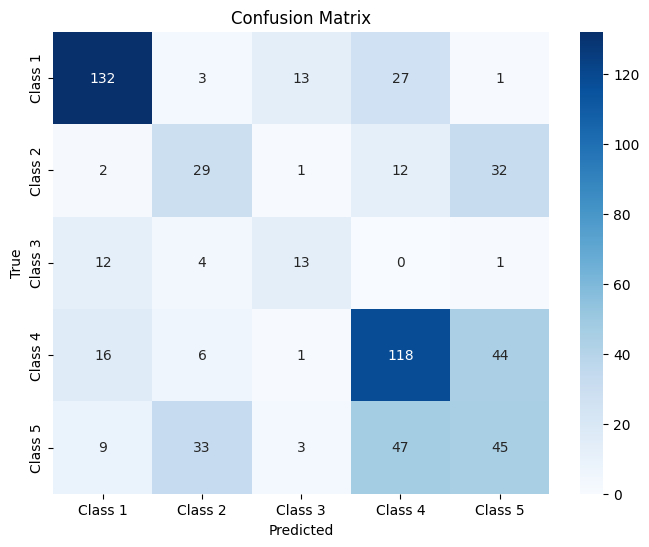

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 1", "Class 2", "Class 3", "Class 4", "Class 5"], yticklabels=["Class 1", "Class 2", "Class 3", "Class 4", "Class 5"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_rf = RandomForestClassifier()

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200, 250, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [ ]:
model_grid = GridSearchCV(model_rf,
                          param_grid=param_grid,
                          scoring='accuracy',
                          cv=3,
                          verbose=2)

In [ ]:
model_grid.fit(x_train, y_train)

Fitting 3 folds for each of 540 candidates, totalling 1620 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   2.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.3s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.7s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.8s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total 

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 250, 300]},
             scoring='accuracy', verbose=2)

In [ ]:
model_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}

In [ ]:
model_final = model_grid.best_estimator_

In [ ]:
model_final.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 30,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

**Model Evaluation**

In [ ]:
y_pred = model_final.predict(x_test)

In [ ]:
y_pred

array(['low', 'low', 'empty', 'medium', 'low', 'empty', 'high', 'low',
       'low', 'medium', 'low', 'low', 'high', 'empty', 'empty', 'empty',
       'low', 'low', 'empty', 'low', 'low', 'jam', 'medium', 'medium',
       'high', 'low', 'medium', 'empty', 'empty', 'empty', 'low', 'high',
       'low', 'low', 'low', 'low', 'empty', 'low', 'low', 'low', 'empty',
       'low', 'empty', 'empty', 'low', 'low', 'jam', 'low', 'medium',
       'empty', 'low', 'low', 'low', 'low', 'medium', 'low', 'empty',
       'high', 'jam', 'medium', 'medium', 'low', 'medium', 'empty',
       'empty', 'low', 'low', 'medium', 'empty', 'low', 'low', 'low',
       'low', 'high', 'empty', 'low', 'medium', 'medium', 'low', 'empty',
       'medium', 'empty', 'empty', 'high', 'high', 'empty', 'high', 'low',
       'high', 'high', 'empty', 'empty', 'low', 'medium', 'low', 'high',
       'low', 'low', 'high', 'low', 'empty', 'jam', 'medium', 'empty',
       'jam', 'empty', 'low', 'empty', 'empty', 'medium', 'low', '

In [ ]:
cr = metrics.classification_report(y_test,y_pred,output_dict=True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
empty,0.817143,0.812500,0.814815,176.000000
high,0.602941,0.539474,0.569444,76.000000
jam,0.677419,0.700000,0.688525,30.000000
low,0.661836,0.740541,0.698980,185.000000
medium,0.552846,0.496350,0.523077,137.000000
accuracy,0.678808,0.678808,0.678808,0.678808
macro avg,0.662437,0.657773,0.658968,604.000000
weighted avg,0.675733,0.678808,0.676016,604.000000


**AUC**

In [ ]:
metrics.roc_auc_score(np.where(y_test=="high",1,0),
                      np.where(y_pred=="high",1,0))

0.7441686602870813

In [ ]:
metrics.roc_auc_score(np.where(y_test=="low",1,0),
                      np.where(y_pred=="low",1,0))

0.7867380506998645

In [ ]:
metrics.roc_auc_score(np.where(y_test=="empty",1,0),
                      np.where(y_pred=="empty",1,0))

0.8688668224299065

In [ ]:
metrics.roc_auc_score(np.where(y_test=="jam",1,0),
                      np.where(y_pred=="jam",1,0))

0.8412891986062718

In [ ]:
metrics.roc_auc_score(np.where(y_test=="medium",1,0),
                      np.where(y_pred=="medium",1,0))

0.6892886728457776

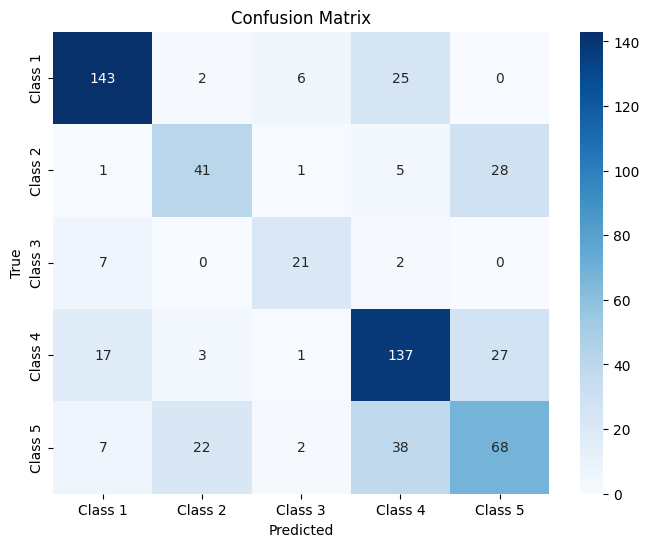

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 1", "Class 2", "Class 3", "Class 4", "Class 5"], yticklabels=["Class 1", "Class 2", "Class 3", "Class 4", "Class 5"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

**Save Model**

In [ ]:
pickle.dump(model_final,open('/content/gdrive/MyDrive/AIL_project/model/model_RandomForest.pickle',mode='wb'))

*Conclusion:*
- Sau khi sử dụng PCA để giảm chiều dữ liệu thì thời gian train model đã nhanh hơn và hiệu suất cũng tăng lên.
- Model sử dụng thuật toán Random Forest dự đoán tốt nhất trong 4 model.
- Dựa theo các chỉ số Evaluation thì model Random Forest có chỉ số khá tốt, nằm trong khoảng đánh giá Good Model - Exellent Model.
- Model Decision Tree có chỉ số khá thấp, model dự đoán kém nhất ( trong 4 thuật toán) cho tập data.
- Và cuối cùng, dự án sẽ đi đến phần kết hợp cả PCA để giảm chiều dữ liệu, SMOTE để giải quyết vấn đề dữ liệu mất cân bằng và điều chỉnh tham số phù để chọn ra model phân loại tốt nhất.
- Tất cả model ngoại trừ Decision Tree đều có hiệu suất tốt.

-----
# **END**